In [2]:
import numpy as np
from matplotlib import pyplot as plt

Створення кластерів

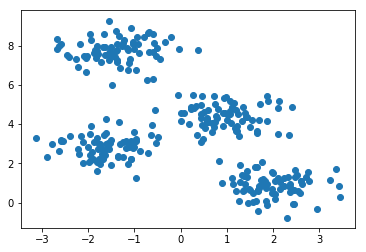

In [3]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Алгоритм k-means

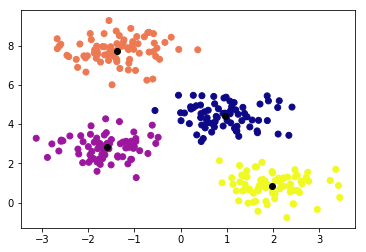

In [10]:
def k_means(X, clusters_n = 2, n_init = 10):

    J_func = 1
    for val in range(n_init):
        initial_points_indexes = np.random.choice(len(X), clusters_n)
        initial_points = np.array([X[value] for value in initial_points_indexes])

        while True:
            cluster_indexes = []
            for i in range(len(X)):
                cluster_min = [np.sqrt((X[i][0] - y[0])**2 + (X[i][1] - y[1])**2) for y in initial_points]
                cluster_indexes.append(cluster_min.index(min(cluster_min))) 

            new_initial_points = []
            for k in range(clusters_n):
                x = [np.mean([X[i,0] for i in range(len(X)) if cluster_indexes[i] == k]), 
                     np.mean([X[i,1] for i in range(len(X)) if cluster_indexes[i] == k])] 
                new_initial_points.append(x)
            new_initial_points = np.array(new_initial_points)
            if np.all(new_initial_points == initial_points):
                break
            initial_points = new_initial_points

        J_func_new = 1/len(X) * sum([np.sqrt((X[i][0] - y[0])**2 + (X[i][1] - y[1])**2) for y in initial_points])
        if J_func_new <= J_func:
            real_points = initial_points
            J_func = J_func_new
        elif val == n_init - 1 and J_func == 1:
            real_points = initial_points
        

    return real_points, cluster_indexes

initial_points, cluster_indexes = k_means(X,4)
plt.scatter(X[:, 0], X[:, 1], c = cluster_indexes, cmap='plasma')
plt.scatter(initial_points[:,0], initial_points[:, 1], c='black')
plt.show()

Порівняння із алгоритмом із sklearn

In [165]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

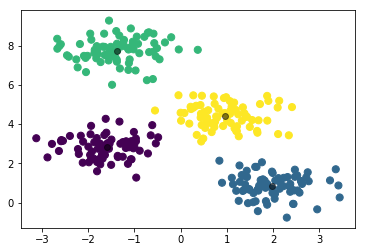

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', alpha=0.5)
plt.show()